examples

In [1]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing as mp

from face_detections import face_detect, gray_scale, cv_face_detect

/opt/ml/project/data_processing/face_detections.py:21: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if face is ():
2022-10-28 02:14:09.826493: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 02:14:10.050722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-28 02:14:10.050745: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-28 02:14:10.089804: E tensorflow/stream_executor/cuda/cuda_bl

In [2]:
os.path.dirname(os.path.abspath('__file__'))

'/opt/ml/project/data_processing'

In [3]:
class CFG:
    data_dir = os.getcwd() + '/../input/data/train' # /opt/ml/project/DataProcessing/../input/data/train
    img_dir = f'{data_dir}/images'
    df_path = f'{data_dir}/train.csv'

In [4]:
num2class = ['incorrect_mask', 'mask1', 'mask2', 'mask3', 'mask4', 'mask5', 'normal']
class2num = {k:v for v, k in enumerate(num2class)}
print(class2num)

df = pd.read_csv(CFG.df_path)
df.head()
df['path']

{'incorrect_mask': 0, 'mask1': 1, 'mask2': 2, 'mask3': 3, 'mask4': 4, 'mask5': 5, 'normal': 6}


0       000001_female_Asian_45
1       000002_female_Asian_52
2         000004_male_Asian_54
3       000005_female_Asian_58
4       000006_female_Asian_59
                 ...          
2695      006954_male_Asian_19
2696      006955_male_Asian_19
2697      006956_male_Asian_19
2698      006957_male_Asian_20
2699      006959_male_Asian_19
Name: path, Length: 2700, dtype: object

/opt/ml/project/data_processing/../input/data/train/images/000001_female_Asian_45/incorrect_mask.jpg
(244, 220, 3)
162 169 172
101.88209761549925 121.56909463487332 149.95774962742175
56.6200090485785 51.74835824087482 49.041183417019866


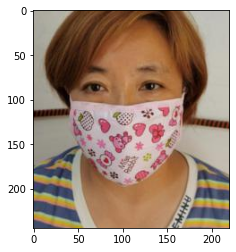

In [14]:
def image_path(idx, normal=6):
    return CFG.img_dir +'/' + df['path'][idx] + '/' + num2class[normal] + '.jpg'

print(image_path(0, 0))
image = cv2.imread(image_path(0, 5))
image = image[145:145+244, 76:76+220]
print(image.shape)
print(image[0][0][0], image[0][0][1], image[0][0][2]) # B, G, R
# mean of B, G, R
print(np.mean(image[:, :, 0]), np.mean(image[:, :, 1]), np.mean(image[:, :, 2]))
# std of B, G, R
print(np.std(image[:, :, 0]), np.std(image[:, :, 1]), np.std(image[:, :, 2]))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image = cv2.imread(image_path(1246, 2))

face_image, x, y= face_detect(image, gray_scale)
# if face_image is None:
#     face_image, x, y = cv_face_detect(image)
# face_image = cv_face_detect(image)
print(face_image.shape)
print(x, y)    
plt.imshow(face_image)
plt.show()
print(face_image.shape)

In [ ]:
image = cv2.imread(image_path(132, 5))
h, w, c = image.shape
h = 195
w = 176
x = 102
y = 193
image = image[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# no image: 006056_female_Asian_19/mask2.jpg -> 006056_femail_Asian_19/mask2.png
# print(image_path(2256, 2))
# image = cv2.imread(image_path(2256, 2))
# print(image is None)

image = cv2.imread(image_path(254, 6))
face_image, x, y = cv_face_detect(image)
print(x, y) # [x, y, x+w, y+h] # faces[1]:faces[3], faces[0]:faces[2])
print(face_image.shape)
plt.imshow(face_image)
plt.show()



In [ ]:
heights = []
widths  = []
x_list = []
y_list = []
count = 0
no_image_paths = []
no_face_detect = []
for i in range(len(df['path'])):
    for j in range(len(num2class)):
        image = cv2.imread(image_path(i, j))
        if image is None:
            no_image_paths.append(image_path(i, j))
            continue
        face_image, x, y = face_detect(image, gray_scale)
        if face_image is None:
            face_image, x, y = cv_face_detect(image)
        if face_image is not None:
        # face_image = cv_face_detect(image)
            h, w, _ = face_image.shape
            heights.append(h)
            widths.append(w)
            x_list.append(x)
            y_list.append(y)
        else:
            count += 1
            no_face_detect.append(image_path(i, j))
            

In [ ]:
print(round(sum(heights) / len(heights))) # 195
print(round(sum(widths) / len(widths))) # 176
print(round(sum(x_list) / len(x_list))) # 102
print(round(sum(y_list) / len(y_list))) # 193
print(len(heights), len(widths))
print(f'no image path detected: {len(no_image_paths)}')
print(f'no face detected: {count}')

'''
mean height: 195
mean width: 176
num of images: 17816 17816
no image path detected: 865 -> *.png, *.jpeg
no face detected: 219
'''

In [28]:
data_df = pd.read_csv('/opt/ml/project/Dataset/data_df.csv')
data_df.head()

,image_path,label
0,/opt/ml/project/input/data/train/images/000001...,4
1,/opt/ml/project/input/data/train/images/000001...,16
2,/opt/ml/project/input/data/train/images/000001...,4
3,/opt/ml/project/input/data/train/images/000001...,10
4,/opt/ml/project/input/data/train/images/000001...,4


150 149 151
151 149 150


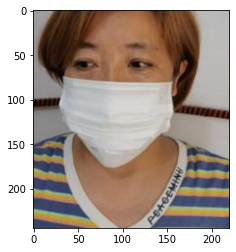

In [27]:
image = cv2.imread(data_df['image_path'][0])
image = image[145:145+244, 76:76+220]
print(image[20][0][0], image[20][0][1], image[20][0][2]) # B, G, R
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image[20][0][0], image[20][0][1], image[20][0][2]) # R, G, B
plt.imshow(image)
plt.show()

In [20]:
# mean of (B, G, R)? (R, G, B)? -> (R, G, B)!
print(np.mean(image[:, :, 0]), np.mean(image[:, :, 1]), np.mean(image[:, :, 2]))
# std of (B, G, R)? (R, G, B)? -> (R, G, B)!
print(np.std(image[:, :, 0]), np.std(image[:, :, 1]), np.std(image[:, :, 2]))

144.06162444113264 125.72567064083458 112.77222429210134
49.76385594898286 53.55492678591788 57.97183266688611


In [33]:
reds_mean = []
reds_std = []
blues_mean = []
blues_std = []
greens_mean = []
greens_std = []

for i in data_df['image_path']:
    image = cv2.imread(i)
    image = image[145:145+244, 76:76+220]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # (R, G, B)
    
    reds_mean.append(np.mean(image[:, :, 0]))
    reds_std.append(np.std(image[:, :, 0]))
    
    blues_mean.append(np.mean(image[:, :, 1]))
    blues_std.append(np.std(image[:, :, 1]))
    
    greens_mean.append(np.mean(image[:, :, 2]))
    greens_std.append(np.std(image[:, :, 2]))
    

In [35]:
print(f'red mean: {round(sum(reds_mean) / len(reds_mean)) / 255.}')
print(f'red std: {round(sum(reds_std) / len(reds_std)) / 255.}')
print(f'blue mean: {round(sum(blues_mean) / len(blues_mean)) / 255.}')
print(f'blue std: {round(sum(blues_std) / len(blues_std)) / 255.}')
print(f'green mean: {round(sum(greens_mean) / len(greens_mean)) / 255.}')
print(f'green std: {round(sum(greens_std) / len(greens_std)) / 255.}')

red mean: 0.5372549019607843
red std: 0.22745098039215686
blue mean: 0.4823529411764706
blue std: 0.23529411764705882
green mean: 0.4549019607843137
green std: 0.24313725490196078
